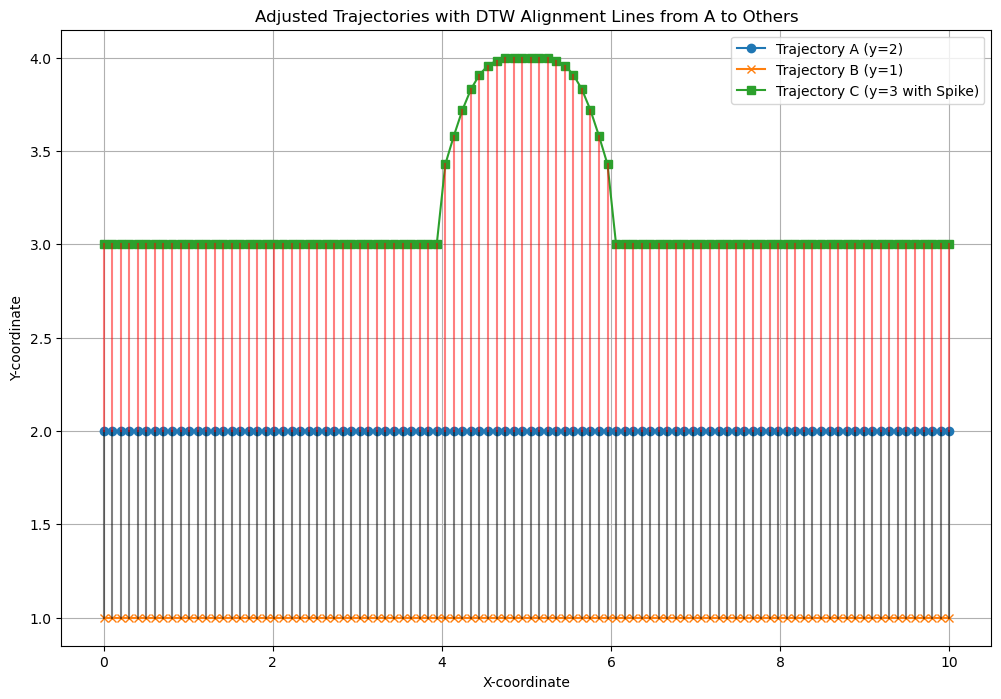

DTW Distance between A and B (Flat vs Flat): 100.00
DTW Distance between A and C (Flat vs Spike): 116.81


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Generate Trajectory A: Flat line at y=2 (Target Curve)
x_a = np.linspace(0, 10, 100)
y_a = np.full_like(x_a, 2)  # Constant value for a flat line at y=2
trajectory_a = np.column_stack((x_a, y_a))

# Generate Trajectory B: Flat line at y=1 (Below the target)
y_b = np.full_like(x_a, 1)  # Constant value for a flat line at y=1
trajectory_b = np.column_stack((x_a, y_b))

# Generate Trajectory C: Flat line at y=3 with a spike
y_c = np.full_like(x_a, 3)  # Constant value for a flat line at y=3
y_c[40:60] += np.exp(-(x_a[40:60]-5)**4)  # Gradual spike around x=5
trajectory_c = np.column_stack((x_a, y_c))

# Compute DTW distances
distance_ab, path_ab = fastdtw(trajectory_a, trajectory_b, dist=euclidean)
distance_ac, path_ac = fastdtw(trajectory_a, trajectory_c, dist=euclidean)

# Plot the trajectories
plt.figure(figsize=(12, 8))
plt.plot(trajectory_a[:, 0], trajectory_a[:, 1], label=f"Trajectory A (y=2)", marker='o')
plt.plot(trajectory_b[:, 0], trajectory_b[:, 1], label=f"Trajectory B (y=1)", marker='x')
plt.plot(trajectory_c[:, 0], trajectory_c[:, 1], label=f"Trajectory C (y=3 with Spike)", marker='s')

# Plot DTW alignment lines only from A to B
for (map_a, map_b) in path_ab:
    plt.plot([trajectory_a[map_a, 0], trajectory_b[map_b, 0]], 
             [trajectory_a[map_a, 1], trajectory_b[map_b, 1]], 'k-', alpha=0.5)

# Plot DTW alignment lines only from A to C
for (map_a, map_c) in path_ac:
    plt.plot([trajectory_a[map_a, 0], trajectory_c[map_c, 0]], 
             [trajectory_a[map_a, 1], trajectory_c[map_c, 1]], 'r-', alpha=0.5)

plt.title("Adjusted Trajectories with DTW Alignment Lines from A to Others")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.grid(True)
plt.show()

# Print DTW distances for clarity
print(f"DTW Distance between A and B (Flat vs Flat): {distance_ab:.2f}")
print(f"DTW Distance between A and C (Flat vs Spike): {distance_ac:.2f}")
